# A script to plot a map of the boxes of dust flux with land sea mask

## Loading the netCDF file with the distinct boxes in the ocean and the land-sea mask 

In [4]:
# load packages

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
from matplotlib import colors as mcolors

import iris
import iris.plot as iplt
import iris.quickplot as qplt
#plt.interactive(True)

import numpy as np
import pandas as pd

import cf_units as unit

#iris.FUTURE.netcdf_promote=True

In [5]:

fname = '/nfs/see-fs-01_users/ee14s2r/working/surf_files/eNd_dust_mask/dust_boxes_final.nc'

cube=iris.load(fname)


##print the cubes, this shows the list of cubes and their indexing 
print(cube)


# Using cube[0] 
Dust_eNd_regions_nan= cube[0][:,:,:,:]
Dust_eNd_regions_0= cube[1][:,:,:,:]


time,depth,latitude,longitude=Dust_eNd_regions_nan.shape
time,depth,latitude,longitude=Dust_eNd_regions_0.shape


print Dust_eNd_regions_nan.shape


0: Dust_Regions_eNd / (1)              (time: 1; depth: 1; latitude: 73; longitude: 98)
1: background_Epsilon_Nd / (1)         (time: 1; depth: 1; latitude: 73; longitude: 98)
(1, 1, 73, 98)


/apps/developers/libraries/python-libs/1.6/1/bit-64-canopy-2.1.3/lib/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/apps/developers/libraries/python-libs/1.6/1/bit-64-canopy-2.1.3/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1906: UserWarning: Gracefully filling 'depth' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/apps/developers/libraries/python-libs/1.6/1/bit-64-canopy-2.1.3/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1811: UserWarning: Ignoring netCDF variable u'time' invalid units u'days since 0000-01-01 00:00.00'
  warnings.warn(msg.encode('ascii', errors='backslashreplace')

In [6]:
#print(Atlantic[:,:])
print(Dust_eNd_regions_nan[:,0,56,50])

Dust_Regions_eNd / (1)              (time: 1)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          depth: -2147483647 m
          latitude: 50.0 degrees
          longitude: 187.5 degrees


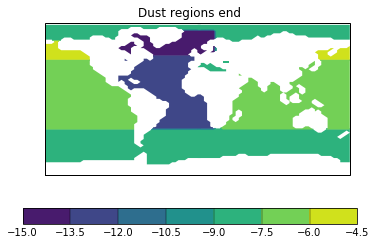

In [7]:
#plt.figure(figsize=(10, 8))
qplt.contourf(Dust_eNd_regions_nan[0,0,:,:])

NameError: name 'cb' is not defined

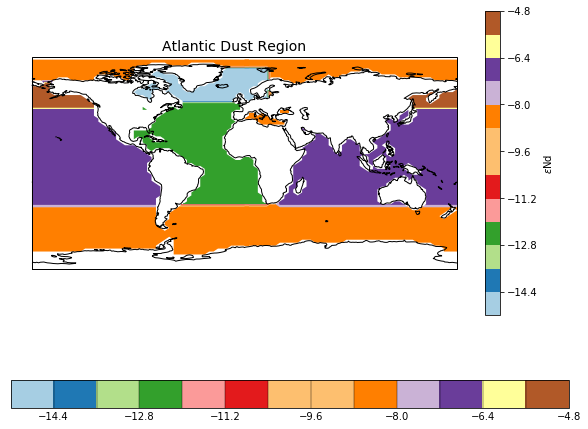

In [8]:
plt.figure(figsize=(10, 8))
# Get the Purples "Brewer" palette.
brewer_cmap = plt.get_cmap('brewer_Paired_12')



# any special behaviour for these.

qplt.contourf(Dust_eNd_regions_nan[0,0,:,:], brewer_cmap.N, cmap=brewer_cmap)
ax = plt.gca()
ax.coastlines()



plt.title('Atlantic Dust Region',fontsize=14)
plt.colorbar(label='${\epsilon}$Nd')

#plt.title('Atlantic Dust Region ',fontsize=14)
cb.ax.set_ylabel('Nd')


#ax.coastlines()

plt.show()



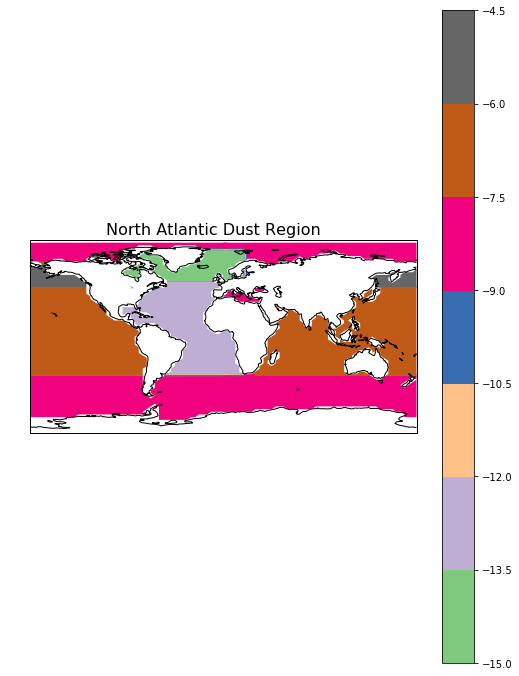

In [9]:
import cartopy.crs as ccrs

plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
iplt.contourf(Dust_eNd_regions_nan[0,0,:,:])
plt.title('North Atlantic Dust Region',fontsize=16)
plt.set_cmap('brewer_Accent_08')
ax = plt.gca()
ax.coastlines()

#colour bar
#cb = plt.colorbar()

#plt.subplot(1, 2, 2)
#iplt.contourf(Atlantic[0,0,:,:])
#plt.title('Atlantic Dust Region',fontsize=16)
#plt.set_cmap('brewer_Paired_12')
#ax = plt.gca()
#ax.coastlines()

#colour bar
cb = plt.colorbar()


#plt.subplot(1, 2, 3)
#iplt.contourf(N_Pacific[0,0,:,:])
#plt.title('Pacific eNd')#,fontsize=17)
#plt.set_cmap('brewer_Paired_12')
#ax = plt.gca()
#ax.coastlines()

#plt.subplot(1, 2, 2)
#qplt.contourf(Atlantic[:,:])
#ax = plt.gca()
#ax.coastlines()

#ax = plt.subplot(1, 2, 2, projection=ccrs.RotatedPole(100, 37))
#qplt.contourf(N_Atlantic[:,:], 25)
#ax.coastlines()

plt.show()

NameError: name 'N_Pacific' is not defined

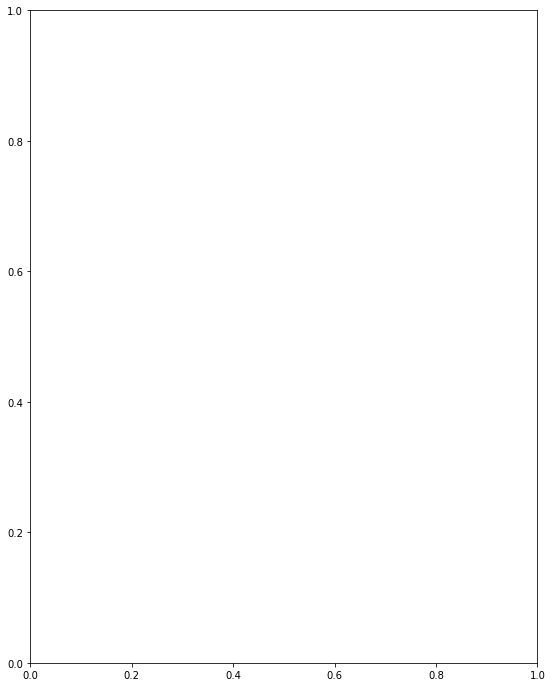

In [10]:
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
iplt.contourf(N_Pacific[0,0,:,:])
plt.title('North Pacific Dust Region',fontsize=16)
plt.set_cmap('brewer_Set1_09')#'brewer_Dark2_08')
ax = plt.gca()
ax.coastlines()

plt.subplot(1, 2, 2)
iplt.contourf(I_Pacific[0,0,:,:])
plt.title('Indo Pacific Dust Region',fontsize=16)
plt.set_cmap('brewer_Set1_09')#'brewer_Accent_08')
ax = plt.gca()
ax.coastlines()

#colour bar
#cb = plt.colorbar()

plt.show()

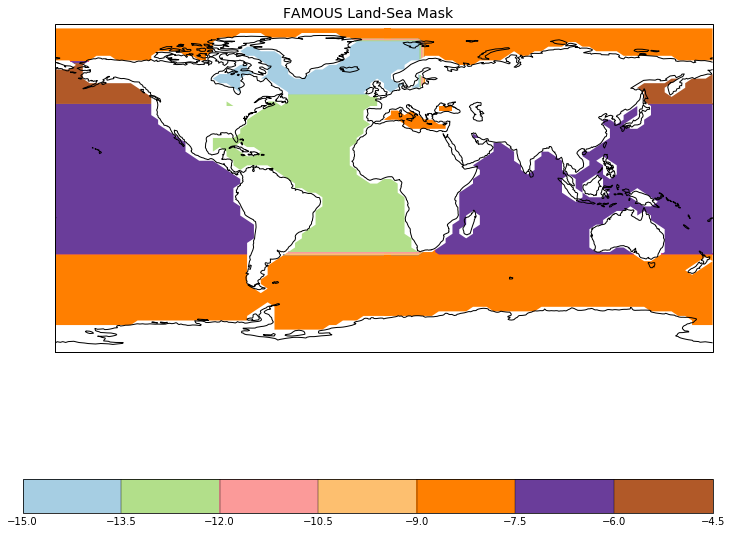

In [11]:
plt.figure(figsize=(20, 12))

plt.subplot(1, 2, 1)
qplt.contourf(Dust_eNd_regions_nan[0,0,:,:])
plt.title('FAMOUS Land-Sea Mask',fontsize=14)
plt.set_cmap('brewer_Paired_12') #brewer_RdBu_15')
#plt.set_cmap('brewer_Set1_09')
ax = plt.gca()
ax.coastlines()

#plt.grid(True)
plt.tight_layout()

ax = plt.gca()

#ax.coastlines()

plt.show()


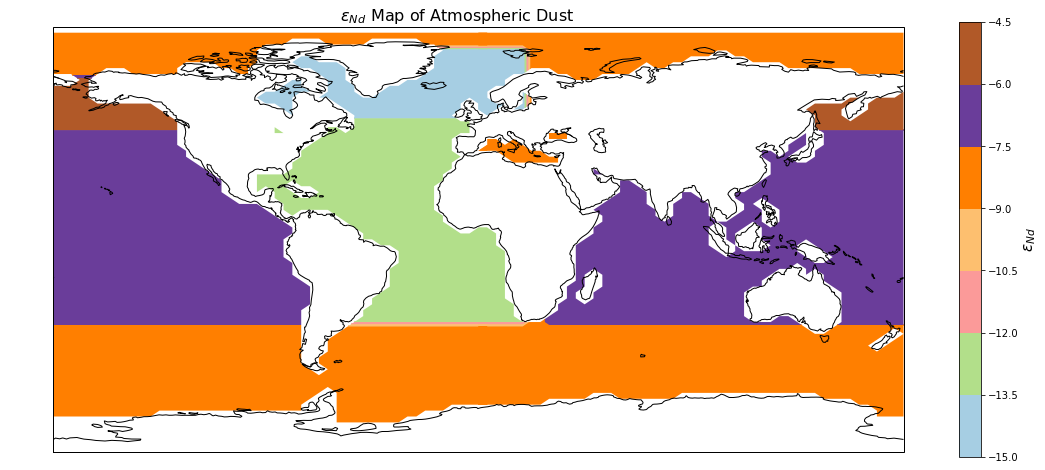

In [12]:
plt.figure(figsize=(20,8))

#iplt.contourf(Atlantic[0,0,:,:])
iplt.contourf(Dust_eNd_regions_nan[0,0,:,:])
#iplt.contourf(N_Pacific[0,0,:,:])
#iplt.contourf(I_Pacific[0,0,:,:])
#iplt.contourf(Background[0,0,:,:])

plt.gca().coastlines()
#plt.set_cmap('bwr')
plt.set_cmap('brewer_Paired_12')#brewer_YlGnBu_09')#brewer_RdYlBu_11')#brewer_RdYlBu_11')#brewer_Set1_09')


plt.title('${\epsilon}_N$$_d$ Map of Atmospheric Dust ',fontsize=16)


#colour bar
cb = plt.colorbar()
cb.ax.set_ylabel('${\epsilon}_N$$_d$',fontsize=15)

#$^{143}$Nd
#plt.grid(True)
#plt.tight_layout()
#plt.figure(figsize=(3,4))
plt.show()

In [ ]:
print(Atlantic[:,:,56,80])

In [ ]:
plt.figure(figsize=(10,5))
#iplt.contourf(Background[0,0,:,:])
iplt.contourf(Atlantic[0,0,:,:])
#|iplt.contourf(N_Atlantic[0,0,:,:])
#iplt.contourf(N_Pacific[0,0,:,:])
#iplt.contourf(I_Pacific[0,0,:,:])

plt.gca().coastlines()
#plt.set_cmap('bwr')
plt.set_cmap('brewer_Accent_08')

plt.title('Background eNd',fontsize=17)

#colour bar
cb = plt.colorbar()
#cb.ax.set_ylabel('log10')

plt.grid(True)
plt.tight_layout()
#plt.figure(figsize=(3,4))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
#iplt.contourf(Background[0,0,:,:])
#iplt.contourf(Atlantic[0,0,:,:])
#iplt.contourf(N_Atlantic[0,0,:,:])
iplt.contourf(N_Pacific[0,0,:,:])
#iplt.contourf(I_Pacific[0,0,:,:])

plt.gca().coastlines()
#plt.set_cmap('bwr')
plt.set_cmap('brewer_Accent_08')

plt.title('North Atlantic eNd',fontsize=17)

#colour bar
cb = plt.colorbar()
#cb.ax.set_ylabel('log10')

plt.grid(True)
plt.tight_layout()
#plt.figure(figsize=(3,4))
plt.show()